'A' --> 'G'
Mayor ancho de banda: A > B > D > F > G -> 950mb
El camino más corto: A > C > E > G -> 3 routers


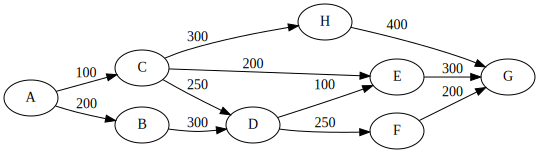

In [46]:
from graphviz import Digraph
from collections import deque
from IPython.display import display

def distancia_maxima(grafo, inicio):
    repr = {nodo: (float('-inf'), []) for nodo in grafo}
    repr[inicio] = (0, [inicio])
    no_visitados = set(grafo)

    while no_visitados:
        nodo_max = max(no_visitados, key=lambda nodo: repr[nodo][0])
        no_visitados.remove(nodo_max)

        for conector, peso in grafo[nodo_max].items():
            if conector in no_visitados: #---------------------------------------------------
                nueva_distancia = repr[nodo_max][0] + peso
                if nueva_distancia > repr[conector][0]: #Actualizamos solo si es mayor el ancho de banda
                    repr[conector] = (nueva_distancia, repr[nodo_max][1] + [conector])
    return repr

def routers(grafo, inicio, fin):
    cola = deque([(inicio, [inicio])])
    visitados = set()

    while cola:
        actual, camino = cola.popleft()
        if actual == fin: #Fin
            return camino

        for vecino in grafo[actual]: #
            if vecino not in visitados:
                visitados.add(vecino)
                cola.append((vecino, camino + [vecino]))

if __name__ == "__main__":

    grafo = {
        'A': {'B': 200, 'C': 100},
        'B': {'D': 300},
        'C': {'D': 250, 'E': 200, 'H': 300},
        'D': {'E': 100, 'F': 250},
        'E': {'G': 300},
        'F': {'G': 200},
        'H': {'G': 400},
        'G': {}
    }

    distancia_min = distancia_minima(grafo, 'A')
    distancia_max = distancia_maxima(grafo, 'A')
    cant_routers = routers(grafo, 'A', 'G')
    
    print("'A' --> 'G'")
    print(f"Mayor ancho de banda: {' > '.join(distancia_max['G'][1])} -> {distancia_max['G'][0]}mb")
    print(f"El camino más corto: {' > '.join(cant_routers)} -> {len(cant_routers) - 1} routers")
    
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    for nodo, conectores in grafo.items():
        dot.node(nodo)
        for conector, peso in conectores.items():
            dot.edge(nodo, conector, label=str(peso))


    display(dot)
